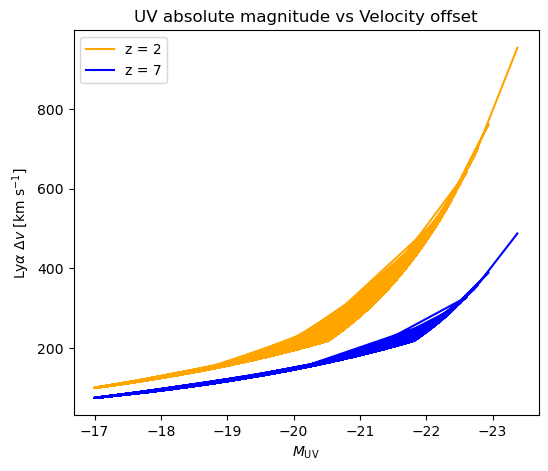

In [10]:
#replicating CMason paper +18 from Ting Yi's dataset

import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

#velocity offset vs Muv

file = "D:/Master-Thesis/21cmFAST-master/taudamp_z008.00_nf0.62378_1000_300Mpc_master_bubnoadded.csv"
df = pd.read_csv("D:/Master-Thesis/21cmFAST-master/taudamp_z008.00_nf0.62378_1000_300Mpc_master_bubnoadded.csv")  

muv_array = df["Muv"].to_numpy()



def velocity_offset(Muv, z):
    gamma = -0.3 if Muv >= (-20.0 - 0.26 * z) else -0.7
    delta_v = 10**(0.32 * gamma * (Muv + 20.0 + 0.26 * z) + 2.34)
    return delta_v


delta_v_array = np.array([velocity_offset(muv, 2) for muv in muv_array])
delta_v_array2 = np.array([velocity_offset(muv, 7) for muv in muv_array])

plt.figure(figsize=(6, 5))
plt.plot(muv_array, delta_v_array, color='orange', linestyle='-', marker='', label='z = 2')  
plt.plot(muv_array, delta_v_array2, color='blue', linestyle='-', marker='', label='z = 7')  
plt.gca().invert_xaxis()  #invert the x axis
plt.ylabel(r'Ly$\alpha$ $\Delta v$ [km s$^{-1}$]')
plt.xlabel(r'$M_{\mathrm{UV}}$')
plt.title(r'UV absolute magnitude vs Velocity offset')
plt.legend()

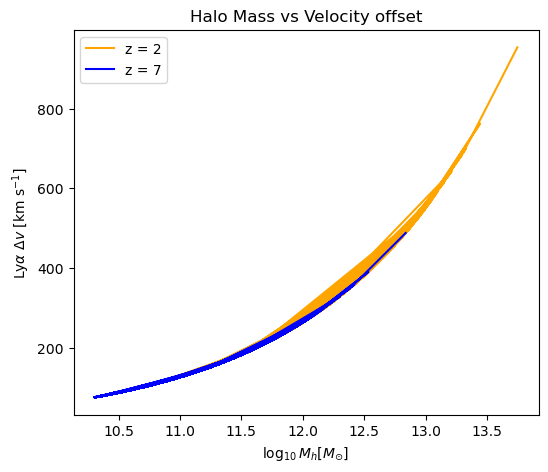

In [11]:
#log10 Mh[solar] vs zspec


muv_array = df["Muv"].to_numpy()
z = 2.0 

#halo masss = log10 Mh[solar mass]

def h_mass(Muv, z):
    gamma = -0.3 if Muv >= (-20.0 - 0.26 * z) else -0.7
    Halo_mass = gamma*(Muv + 20.0 + 0.26 * z) + 11.75
    return Halo_mass


halo_mass_array = np.array([h_mass(muv, 2) for muv in muv_array])
halo_mass_array2 = np.array([h_mass(muv, 7) for muv in muv_array])

plt.figure(figsize=(6, 5))
plt.plot(halo_mass_array, delta_v_array, color='orange', linestyle='-', marker='', label='z = 2')  
plt.plot(halo_mass_array2, delta_v_array2, color='blue', linestyle='-', marker='', label='z = 7') 
#plt.scatter(halo_mass_array2, delta_v_array2, color='blue', s = 10, label='z = 7') 
plt.ylabel(r'Ly$\alpha$ $\Delta v$ [km s$^{-1}$]')
plt.xlabel(r'$\log_{10} M_h [M_{\odot}]$')
plt.title('Halo Mass vs Velocity offset')
plt.legend()




126
126
126
[ 357.62781665  283.98501204  146.73932297  417.14795863   61.34856859
   32.81956217  247.73210872  278.27307314  153.00991907   89.91162345
   99.93465184   90.63208731  158.3772808    85.61194918  148.62234156
  112.65048407  109.21592105  203.31540978   73.66769301  275.10580913
  199.32042362  137.65648662  281.77833442   81.07807773  292.56630768
  151.11263612  122.31828099   93.77666978  172.41122941   96.51759257
  112.75861489   75.05160857  150.56223327  108.88106865  117.86589501
  134.41524722  123.05133428  156.23511914  124.0663339    44.94945749
  112.15012846  115.33367264  207.17154049   62.0380648   137.43265477
  113.01350167  133.86153456  204.94241294  384.17850908  311.96651369
  185.07543166  159.99428438  137.00311273  199.62319715  199.99033197
   87.27854823  206.07563878  657.39003733  291.43209119  112.26202784
  215.04097852  193.43526028  181.13175077  431.71629804  211.338998
           nan  166.70497326  414.03722441  173.75700715  528.24792

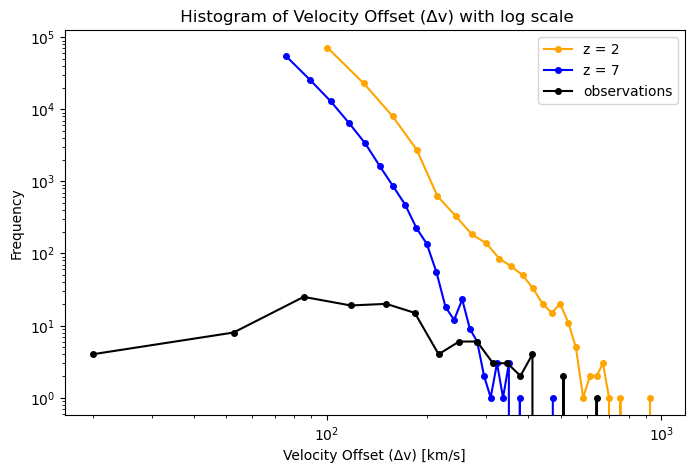

In [12]:
with open('D:/Thesis/LASD/measurements/zsysdf.ascii', 'r') as file:
    header = file.readline().strip().split()

    x_pos_max = []
    L_tot = []
    L_pos = []

    
    for line in file:
        values = line.strip().split()

        try:
           x_pos_max.append(float(values[header.index('x_pos_max')]))
           L_tot.append(float(values[header.index('L_tot')]))
           L_pos.append(float(values[header.index('L_pos')]))
        except ValueError:
            continue

#making numpy arrays
x_pos_max = np.array(x_pos_max)
L_tot = np.array(L_tot)

plt.figure(figsize=(8, 5))
counts, bins = np.histogram(delta_v_array, bins=30)
counts2, bins2 = np.histogram(delta_v_array2, bins=30)
counts3, bins3 = np.histogram(x_pos_max, bins = 30, range = (20, 1000))
plt.plot(bins[:-1], counts, linestyle='-', marker='o', markersize = 4, color='orange',  label='z = 2') 
plt.plot(bins2[:-1], counts2, linestyle='-', marker='o', markersize = 4, color='blue', label='z = 7') 
plt.plot(bins3[:-1], counts3, linestyle='-', marker='o', markersize = 4, color='black', label='observations') 
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Velocity Offset (Δv) [km/s]")
plt.ylabel("Frequency")
plt.title(" Histogram of Velocity Offset (Δv) with log scale")
plt.legend() 
plt.show()

In [13]:
W_values = df["Wint"].to_numpy()
W_values = np.array(W_values)

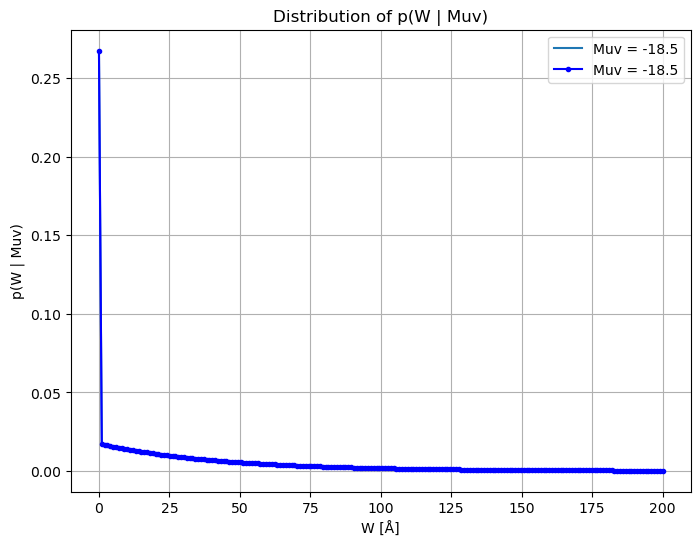

In [14]:
W_values = np.linspace(0, 200, 200)
def A(Muv):
    return 0.65 + 0.1 * np.tanh(3 * (Muv + 20.75))

def Wc(Muv):
    return 31 + 12 * np.tanh(4 * (Muv + 20.25))

def p6(W, Muv):
    A_val = A(Muv)
    Wc_val = Wc(Muv)
    exp_part = (A_val / Wc_val) * np.exp(-W / Wc_val) * heaviside(W)
    delta_part = (1 - A_val) * (W == 0) 
    return exp_part + delta_part


def heaviside(W):
    return 1

#filtered_values = muv_array[(muv_array > -21) & (muv_array < -20)]
Muv = -18.5
plt.figure(figsize=(8, 6))
'''
for Muv in muv_array:
    p_W = np.array([p6(W, Muv) for W in W_values])
    plt.plot(W_values, p_W, label=f"Muv = {Muv}")
'''

p_W = np.array([p6(W, Muv) for W in W_values])
plt.plot(W_values, p_W, label=f"Muv = {Muv}")

p_W = np.array([p6(W, Muv) for W in W_values])
plt.plot(W_values, p_W, marker='o', color = 'Blue', markersize = 3, label=f"Muv = {Muv}")
#plt.scatter(W_values, p_W, color = 'Blue', label=f"Muv = {Muv}")
plt.xlabel("W [Å]")
plt.ylabel("p(W | Muv)")
plt.title("Distribution of p(W | Muv)")
plt.legend()  
plt.grid()
plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 


file_path = 'D:/Thesis/21cmFAST-master/Output/Tot_Tau_lists/output'

def gaussian(velocity, delta_v, sigma, amplitude=1):
    return amplitude * np.exp(-0.5 * ((velocity - delta_v) / sigma) ** 2)

def two_gaussians_with_asymmetry(velocity, v_offset, sigma, l_red_l_total):
    l_red = l_red_l_total
    l_blue = 1 - l_red
    gaussian_blue = gaussian(velocity, -v_offset / 2, sigma, amplitude=l_blue)
    gaussian_red = gaussian(velocity, v_offset / 2, sigma, amplitude=l_red)
    return gaussian_blue + gaussian_red


def plot_transmission_curves(row_number, file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        matrix = []
        for line in lines[2:]: 
            columns = list(map(float, line.strip().split()[:5]))  
            matrix.append(columns)
        
        row1 = list(map(float, lines[0].strip().split()[5:])) 
        row = list(map(float, lines[row_number].strip().split()[5:])) 

    velocity_offsets = np.array(row1[::2]) 
    transmission = np.exp(-np.array(row))
    return velocity_offsets, transmission

def combined_plot(T, I):
    return T * I


observed_gaussians = []

for i in range(len(delta_v_array)): 
    velocity_offsets, T = plot_transmission_curves(i, 'D:/Master-Thesis/21cmFAST-master/Output/Tot_Tau_lists/output')
    if len(T) == 0:
        print(f"Skipping row {i} due to empty transmission curve.")
        continue

    velocity_common = np.linspace(-1000, 3000, len(T))

    # Interpolate transmission curve onto the common velocity grid
    #interp_T = interp1d(velocity_offsets, T, kind='linear', bounds_error=False, fill_value=0)
    #T_interp = interp_T(velocity_common) 

    I = two_gaussians_with_asymmetry(velocity_common, delta_v_array[i], sigma=50, l_red_l_total=0.6)
    print(type(T))
    #print(T)
    print(T.shape)
    
    TI = combined_plot(T, I)

    integral_TI = np.trapz(TI, velocity_common)
    integral_I = np.trapz(I, velocity_common)

    observed_gaussian_value = integral_TI / integral_I
    observed_gaussians.append(observed_gaussian_value)
    print("done")

<class 'numpy.ndarray'>
(400,)
done
Skipping row 1 due to empty transmission curve.
<class 'numpy.ndarray'>
(200,)
done
<class 'numpy.ndarray'>
(200,)
done
<class 'numpy.ndarray'>
(200,)
done


KeyboardInterrupt: 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 


file_path = 'D:/Thesis/21cmFAST-master/Output/Tot_Tau_lists/output'

def gaussian(velocity, delta_v, sigma, amplitude=1):
    return amplitude * np.exp(-0.5 * ((velocity - delta_v) / sigma) ** 2)

def two_gaussians_with_asymmetry(velocity, v_offset, sigma, l_red_l_total):
    l_red = l_red_l_total
    l_blue = 1 - l_red
    gaussian_blue = gaussian(velocity, -v_offset / 2, sigma, amplitude=l_blue)
    gaussian_red = gaussian(velocity, v_offset / 2, sigma, amplitude=l_red)
    return gaussian_blue + gaussian_red


def plot_transmission_curves(row_number, file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        matrix = []
        for line in lines[2:]: 
            columns = list(map(float, line.strip().split()[:5]))  
            matrix.append(columns)
        
        row1 = list(map(float, lines[0].strip().split()[5:])) 
        row = list(map(float, lines[row_number+2].strip().split()[5:]))   ## Adding 2 because data starts from 2 not 0, iteration problem in the next step

    velocity_offsets = np.array(row1[::2]) 
    transmission = np.exp(-np.array(row))
    return velocity_offsets, transmission

def combined_plot(T, I):
    return T * I




# Precompute transmission curves and Gaussians
transmission_curves = []
gaussians = []
valid_indices = []

In [7]:

for i in range(1): 
    velocity_offsets, T = plot_transmission_curves(i, 'D:/Thesis/21cmFAST-master/Output/Tot_Tau_lists/output')
    print(T)
    observed_gaussians = []
    velocity_common = np.linspace(-1000, 3000, len(T))
        
    if len(T) == 0:
        print(f"Skipping row {i} due to empty transmission curve.")
        continue

    # Store valid data
    print(i)
    transmission_curves.append(T)
    I = two_gaussians_with_asymmetry(velocity_common, delta_v_array[i], sigma=50, l_red_l_total=0.6)
    gaussians.append(I)
    valid_indices.append(i)
print("Saving done yayy")

[0.73090192 0.73431881 0.73766905 0.74094936 0.7441609  0.74730715
 0.75039316 0.75341204 0.75637046 0.75927519 0.76212248 0.76491161
 0.76765029 0.7703333  0.77296849 0.77555529 0.77809084 0.7805816
 0.78302395 0.78542524 0.78778348 0.79009586 0.79237065 0.79460194
 0.79679727 0.79895153 0.80107076 0.80315464 0.80519967 0.80721276
 0.80919124 0.81113725 0.81305055 0.81493331 0.81678531 0.81860468
 0.82039775 0.82216103 0.8238968  0.82560403 0.82728585 0.82894125
 0.83057006 0.83217544 0.83375474 0.83531114 0.83684283 0.83835302
 0.83984074 0.84130586 0.84274909 0.84417117 0.84557281 0.84695561
 0.84831606 0.84966001 0.85098226 0.85228696 0.85357318 0.85484168
 0.85609323 0.85732603 0.85854344 0.8597428  0.86092662 0.86209483
 0.86324736 0.86438414 0.86550598 0.86661367 0.86770542 0.86878378
 0.86984782 0.87089923 0.87193622 0.8729596  0.8739702  0.87496797
 0.87595461 0.87692834 0.87788822 0.87883861 0.87977508 0.88070109
 0.88161573 0.88251985 0.88341253 0.88429461 0.88516607 0.88602

NameError: name 'delta_v_array' is not defined

In [ ]:
print(len(I))

In [33]:


for idx, i in enumerate(valid_indices):
    T = transmission_curves[idx]
    I = gaussians[idx]

    TI = combined_plot(T, I)

    integral_TI = np.trapz(TI, velocity_common)
    integral_I = np.trapz(I, velocity_common)

    observed_gaussian_value = integral_TI / integral_I
    observed_gaussians.append(observed_gaussian_value)
    print(f"Done with index {i}")

observed_gaussians = np.array(observed_gaussians)
np.savetxt('observed_gaussians.csv', observed_gaussians, delimiter=',')

print("Observed Gaussians saved to 'observed_gaussians.csv'.")

    

Done with index 0
Done with index 1
Done with index 2
Done with index 3
Done with index 4
Done with index 5
Done with index 6
Done with index 7
Done with index 8
Done with index 9
Done with index 10
Done with index 11
Done with index 12
Done with index 13
Done with index 14
Done with index 15
Done with index 16
Done with index 17
Done with index 18
Done with index 19
Done with index 20
Done with index 21
Done with index 22
Done with index 23
Done with index 24
Done with index 25
Done with index 26
Done with index 27
Done with index 28
Done with index 29
Done with index 30
Done with index 31
Done with index 32
Done with index 33
Done with index 34
Done with index 35
Done with index 36
Done with index 37
Done with index 38
Done with index 39
Done with index 40
Done with index 41
Done with index 42
Done with index 43
Done with index 44
Done with index 45
Done with index 46
Done with index 47
Done with index 48
Done with index 49
Done with index 50
Done with index 51
Done with index 52
Don